Created for basic linear regression, polynomial regression, and multiple regression
Jessica Besnier
June 2022

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.metrics import r2_score
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import datetime
from datetime import datetime 



Linear Regression, R value, and value prediction

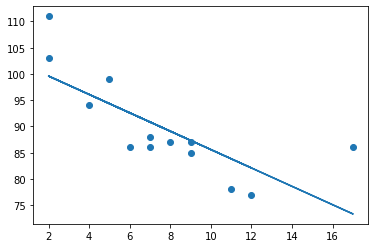

the R value is -0.7586
y= -1.75 x + 103.11


In [6]:
#linear regression scatterplot and line
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)


def myfunc(x):
    return slope*x + intercept

mymodel = list(map(myfunc,x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

#get r value to see how well data fits in linear regression
print('the R value is', round(r,4))
print ('y=', round(slope,2), 'x +', round(intercept,2) )


In [6]:
# to predict future values: 
pvx = 10
predict_value = myfunc(pvx)
print('the predcited y value for the given x value is', predict_value)

the predcited y value for the given x value is 85.59308314937454


Polynomial Regression, R2, Value Precition

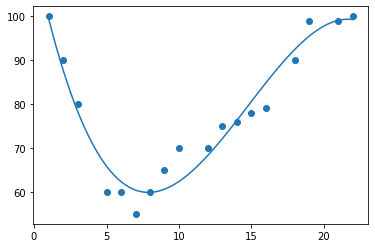

the R2 value is 0.9432150416451026


In [7]:
#polynomial regression
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodelp = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodelp(myline))
plt.show()

#get R2 value
print('the R2 value is',r2_score(y, mymodelp(x)))

In [8]:
#to predict future values
xx= 17
predict = mymodelp(xx)
print ('the predicted  y value is', predict )

the predicted  y value is 88.87331269697998


Multiple Regression

In [9]:
df = pd.read_csv("E:/internship 2022/cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
weight =3300 
volume = 1300
predictedCO2 = regr.predict([[weight, volume]])

#given a 1.3L enginer and 2300 kg, the COs will release _____ every km it drives
print('the predicted CO2 is', predictedCO2)

#the coefficient values are the X's vs. y 
print ('the regression coefficients are ', regr.coef_, 'for weight and volume respectively')

the predicted CO2 is [114.75968007]
the regression coefficients are  [0.00755095 0.00780526] for weight and volume respectively


c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
#scaling (makes it easier to compare)

scale = StandardScaler()

scaledX = scale.fit_transform(X)

print(scaledX)


[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


In [11]:
#predicting with scaling for a 1.3L car that weights 2300kg
scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print('the predicted CO2 is', predictedCO2)

the predicted CO2 is [97.07204485]


c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training and test datasets

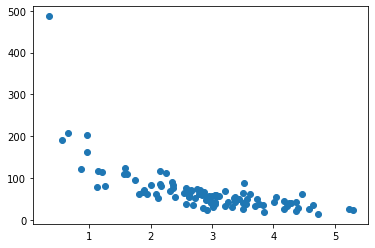

In [12]:
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

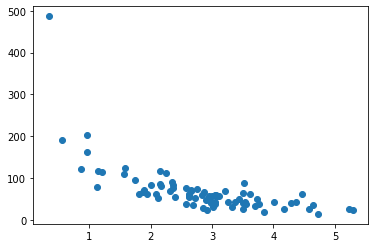

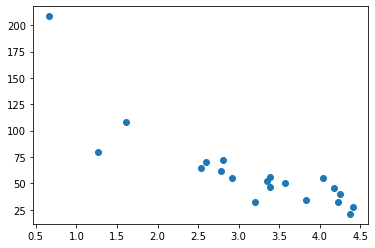

In [13]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

plt.scatter(train_x, train_y)
plt.show()

plt.scatter(test_x, test_y)
plt.show()

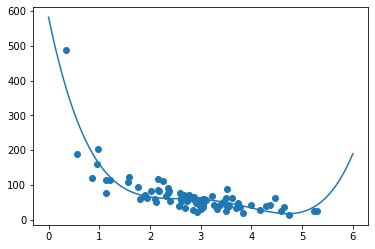

0.79886455446298


In [14]:
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

myline = np.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

r2 = r2_score(train_y, mymodel(train_x))

print(r2)

In [15]:
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)

print(mymodel(5))


0.8086921460343683
22.879625918122315
